<a href="https://colab.research.google.com/github/Tanuja2725/deeplearning/blob/main/22_01_%7CTabular_data_with_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 22nd Jan, 2023
# github deeplearning repo
# Ref: https://docs.fast.ai/tutorial.tabular.html
#      https://confusedcoders.com/data-science/deep-learning/how-to-apply-deep-learning-on-tabular-data-with-fastai
#      https://www.martinalarcon.org/2018-12-31-b-water-pumps/
# Good Kaggle notebook:
#      https://www.kaggle.com/code/rohan1506/fastai-tutorial-detailed
# Good fastai totorial:
#      https://walkwithfastai.com/tab.clas.binary
#      https://walkwithfastai.com/tab.stats
# Also see
#      https://www.mdpi.com/2078-2489/11/2/108
# Objectives:
#           a) Using fastai to preprocess data
#           b) fastai for developing model
#           c) fast ai for making data ready for other libraries

# Tabular models
To get help on fastai functons use `doc()`.<br>
Reference See [here](https://docs.fast.ai/tutorial.tabular.html)<br>
What are DataLoaders? See [here](https://dirk-kalmbach.medium.com/datablock-and-dataloaders-in-fastai-d5aa7ae560e5) and [here](https://muttoni.github.io/blog/machine-learning/fastai/2020/12/26/datablocks-vs-dataloaders.html)

In [ ]:
# 0.0
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
# To see prettier help using doc()
#  Also for creating python packages
!pip install nbdev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.3 MB/s eta 0:00:00


## Call libraries

In [ ]:
# 1.0 Call libraries:

from fastai.tabular import *

# For FillMissing, Categorify, Normalize, untar_data
from fastai.tabular.all import *

## Get data

Pathlib module contains useful functions to perform file-related tasks. Pathlib provides a more readable and easier way to build up paths by representing filesystem paths as proper objects and enables us to write code that is portable across platforms.

In [ ]:
# 1.1 untar_data will download data (if not already downloaded)
#      to /root/.fastai/data/adult_sample

path = untar_data(URLs.ADULT_SAMPLE)
path
print("\n=====\n")
path.ls()
print("\n=====\n")
type(path)

Path('/root/.fastai/data/adult_sample')


=====



(#3) [Path('/root/.fastai/data/adult_sample/adult.csv'),Path('/root/.fastai/data/adult_sample/models'),Path('/root/.fastai/data/adult_sample/export.pkl')]


=====



pathlib.PosixPath

### About pathlib
See [here](https://stackabuse.com/introduction-to-the-python-pathlib-module/)


    Path.cwd(): Return path object representing the current working directory
    Path.home(): Return path object representing the home directory
    Path.stat(): return info about the path
    Path.chmod(): change file mode and permissions
    Path.glob(pattern): Glob the pattern given in the directory that is represented by the path, yielding matching files of any kind
    Path.mkdir(): to create a new directory at the given path
    Path.open(): To open the file created by the path
    Path.rename(): Rename a file or directory to the given target
    Path.rmdir(): Remove the empty directory
    Path.unlink(): Remove the file or symbolic link


In [ ]:
# 2.0
from pathlib import *


In [ ]:
# 2.1
Path.cwd()
Path.home()

Path('/content')

Path('/root')

In [ ]:
#2.1.1 create a directory

Path.mkdir(Path.cwd()/ 'output')

In [ ]:
# 2.2 How to buid paths
outpath = Path.cwd() / 'output' / 'output.xlsx'
outpath

Path('/content/output/output.xlsx')

In [ ]:
type(path)

pathlib.PosixPath

In [ ]:
# 2.3
path.is_dir()
path.stat()

True

os.stat_result(st_mode=16893, st_ino=6029526, st_dev=49, st_nlink=3, st_uid=1000, st_gid=1000, st_size=4096, st_atime=1675359459, st_mtime=1543965152, st_ctime=1675359459)

In [ ]:
# 2.4
path.glob("*.csv")

<generator object Path.glob at 0x7fe785444cf0>

In [ ]:
# 2.5
for i in path.glob("*.csv"):
  print(i)

/root/.fastai/data/adult_sample/adult.csv


## Read our data

In [ ]:
# 3.0 Read the downloaded dataset 
df = pd.read_csv(path / 'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [ ]:
# 3.1
df.shape   # (32561, 15)

(32561, 15)

In [ ]:
# Get no of unique values in each:
for i in df.columns:
  n = df[i].nunique()
  print(f"No of unique values in {i} are {n}")

No of unique values in age are 73
No of unique values in workclass are 9
No of unique values in fnlwgt are 21648
No of unique values in education are 16
No of unique values in education-num are 16
No of unique values in marital-status are 7
No of unique values in occupation are 15
No of unique values in relationship are 6
No of unique values in race are 5
No of unique values in sex are 2
No of unique values in capital-gain are 119
No of unique values in capital-loss are 92
No of unique values in hours-per-week are 94
No of unique values in native-country are 42
No of unique values in salary are 2


## Data types & Data processing

In [ ]:
# 3.2 Define some constants:

dep_var = 'salary'    # target
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']


## Some expts
How do `FillMissing` and `Categorify` behave

Processes to operate on data. Refer below for API:<br>
[FillMissing](https://docs.fast.ai/tabular.core.html#fillmissing) will fill the missing values in the continuous variables by the median of existing values (you can choose a specific value if you prefer)<br>
[Categorify](https://docs.fast.ai/tabular.core.html#categorify): Transform the categorical variables to something similar to pd.Categorical<br>
[Normalize](https://docs.fast.ai/data.transforms.html#normalize) will normalize the continuous variables (subtract the mean and divide by the std)<br>


### FillMissing and Categorigy
While filling missing values in a continouos column, a new column is also created.

In [ ]:
# 4.0
from numpy import NaN
df1 = pd.DataFrame({'a':[NaN,1,2.1,2.4,3.1, NaN]})
to = TabularPandas(df1,
                   [FillMissing, Categorify],   # Try first FillMissing only
                   cont_names = ['a']           # 'a' is a cont column
                   )

to.xs.head(7)

,a_na,a
0,2,2.25
1,1,1.00
2,1,2.10
3,1,2.40
4,1,3.10
5,2,2.25


In [ ]:
# 4.0.1 Change fillstrategy

na_dict={'a':7.0}
fm = FillMissing(fill_strategy=FillStrategy.median,fill_vals=na_dict)

In [ ]:
# 4.0
from numpy import NaN
df1 = pd.DataFrame({'a':[NaN,1,2.1,2.4,3.1, NaN]})
to = TabularPandas(df1,
                   [fm, Categorify],   # Try first FillMissing only
                   cont_names = ['a']           # 'a' is a cont column
                   )

to.xs.head(7)

,a_na,a
0,2,2.25
1,1,1.00
2,1,2.10
3,1,2.40
4,1,3.10
5,2,2.25


### Categorifying a categorical column
NaNs are given a label encoding of 0

In [ ]:
# 4.1
from numpy import NaN
df1 = pd.DataFrame({'a':[NaN,"a","b","a","c", NaN]})
to = TabularPandas(df1,
                   [FillMissing,Categorify],    # FillMissing has no efefct
                   cat_names = ['a']
                   )


to1 = TabularPandas(df1,
                    [Categorify, FillMissing],  # FillMissing has no effect
                    cat_names = ['a'] 
                    ) 

# 4.1.1
to.xs.head(10)
to1.xs.head(10) 

,a
0,0
1,1
2,2
3,1
4,3
5,0


,a
0,0
1,1
2,2
3,1
4,3
5,0


In [ ]:
cat.classes

NameError: ignored

In [ ]:
# 4.0.1 Change fillstrategy

fm = FillMissing(fill_strategy=FillStrategy.mode)

In [ ]:

# 4.1  extar
from numpy import NaN
df1 = pd.DataFrame({'a':[NaN,"a","b","a","c", NaN]})
to = TabularPandas(df1,
                   [fm],    # FillMissing has no efefct
                   cat_names = ['a']
                   )


to.xs.head(10)
 

,a
0,NaN
1,a
2,b
3,a
4,c
5,NaN


## Our data now

In [ ]:
# 5.1 What all we need to do over this data
#  and in what sequence:

procs = [FillMissing, Categorify, Normalize]

About TabularDataLoaders see [here](https://docs.fast.ai/tabular.data.html#tabulardataloaders.from_csv)<br>
The following code does not give satisfactory results

In [ ]:
# Defaults to 80:20
#dls = TabularDataLoaders.from_csv(
#                                  path / 'adult.csv',
#                                  path=path,
#                                  y_names="salary",
#                                  bs = 64,   # Try 2 or 3
#                                  cat_names = cat_names,
#                                  cont_names = cont_names,
#                                  procs = procs)

Instead proceed as follows:<br>
First split the dataset

In [ ]:
# 5.2 Get two splits of data
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [ ]:
# 5.3 This is what splits object is:
splits

((#26049) [21984,29754,27445,14864,14703,24138,2048,15191,587,18008...],
 (#6512) [6272,8348,23047,21134,26765,3911,5771,16542,19705,14168...])

Transform pandas to a fastai data structure known as Tabular Pandas

In [ ]:
# 5.4
to = TabularPandas(
                   df,
                   procs=  [FillMissing,Categorify, Normalize], # [Categorify, FillMissing,Normalize],
                   cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
                   cont_names = ['age', 'fnlwgt', 'education-num'],
                   y_names='salary',
                   splits=splits
                   )

In [ ]:
# 5.5
type(to)
print("\n=======\n")
type(to.xs)

fastai.tabular.core.TabularPandas

pandas.core.frame.DataFrame

In [ ]:
# 5.5.1 Train and valid dataset:
to.train
to.valid

            age  workclass    fnlwgt  education  education-num  \
21984  0.325431          1 -1.016444         16      -0.031179   
29754  0.032593          5 -0.160036         12      -0.424105   
27445 -0.626293          5 -0.206598         12      -0.424105   
14864 -0.260246          5 -1.334598         12      -0.424105   
14703  0.764689          3 -0.694388         10       1.147600   
...         ...        ...       ...        ...            ...   
12376 -0.626293          5 -0.328557         15       1.933452   
30034 -0.113826          5 -0.099850         16      -0.031179   
16418  0.325431          5 -0.032767         16      -0.031179   
21428 -0.699503          5 -0.704771         12      -0.424105   
3827  -1.138761          1  0.021296         16      -0.031179   

       marital-status  occupation  relationship  race      sex  capital-gain  \
21984               1           1             5     2   Female             0   
29754               1           2             5

            age  workclass    fnlwgt  education  education-num  \
6272   0.252222          7  1.071329         12      -0.424105   
8348   0.179012          5  0.139448         10       1.147600   
23047 -0.406665          5 -0.679119         12      -0.424105   
21134 -0.040617          5  0.095995         12      -0.424105   
26765 -0.406665          5 -0.214431          2      -1.209957   
...         ...        ...       ...        ...            ...   
3115  -0.699503          5 -1.272919         12      -0.424105   
6260   0.398641          8 -0.131899         10       1.147600   
29053 -1.138761          3  0.078062         16      -0.031179   
31995  1.203946          5 -0.456639         12      -0.424105   
19046 -0.187036          7 -0.371179         12      -0.424105   

       marital-status  occupation  relationship  race      sex  capital-gain  \
6272                3           6             1     2     Male             0   
8348                3          13             1

## Pre-processed data

In [ ]:
# 6.0
to.xs.head(5)

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
21984,1,16,1,1,5,2,1,0.325431,-1.016444,-0.031179
29754,5,12,1,2,5,5,1,0.032593,-0.160036,-0.424105
27445,5,12,5,2,4,5,1,-0.626293,-0.206598,-0.424105
14864,5,12,5,13,4,5,1,-0.260246,-1.334598,-0.424105
14703,3,10,1,11,5,5,1,0.764689,-0.694388,1.147600


In [ ]:
# 6.1 See now completely preprocessed data:

to.xs.iloc[:2]

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
21984,1,16,1,1,5,2,1,0.325431,-1.016444,-0.031179
29754,5,12,1,2,5,5,1,0.032593,-0.160036,-0.424105


In [ ]:
# 6.2
doc(to.dataloaders)

What are DataLoaders?<br>
DLs help you to investigate, clean, change and prepare you data before, during and after building your deep learning model.

In [ ]:
# 6.3 Build our DataLoaders now:

dls = to.dataloaders(bs=64)

### A bit about `dls` object
Can be skipped

In [ ]:
# 6.3.1 Get train/validation datasets
x = dls.train_ds
x   #  26049 rows x 16 columns
print("\n===========\n")
y = dls.valid_ds
y

            age  workclass    fnlwgt  education  education-num  \
21984  0.325431          1 -1.016444         16      -0.031179   
29754  0.032593          5 -0.160036         12      -0.424105   
27445 -0.626293          5 -0.206598         12      -0.424105   
14864 -0.260246          5 -1.334598         12      -0.424105   
14703  0.764689          3 -0.694388         10       1.147600   
...         ...        ...       ...        ...            ...   
12376 -0.626293          5 -0.328557         15       1.933452   
30034 -0.113826          5 -0.099850         16      -0.031179   
16418  0.325431          5 -0.032767         16      -0.031179   
21428 -0.699503          5 -0.704771         12      -0.424105   
3827  -1.138761          1  0.021296         16      -0.031179   

       marital-status  occupation  relationship  race      sex  capital-gain  \
21984               1           1             5     2   Female             0   
29754               1           2             5

            age  workclass    fnlwgt  education  education-num  \
6272   0.252222          7  1.071329         12      -0.424105   
8348   0.179012          5  0.139448         10       1.147600   
23047 -0.406665          5 -0.679119         12      -0.424105   
21134 -0.040617          5  0.095995         12      -0.424105   
26765 -0.406665          5 -0.214431          2      -1.209957   
...         ...        ...       ...        ...            ...   
3115  -0.699503          5 -1.272919         12      -0.424105   
6260   0.398641          8 -0.131899         10       1.147600   
29053 -1.138761          3  0.078062         16      -0.031179   
31995  1.203946          5 -0.456639         12      -0.424105   
19046 -0.187036          7 -0.371179         12      -0.424105   

       marital-status  occupation  relationship  race      sex  capital-gain  \
6272                3           6             1     2     Male             0   
8348                3          13             1

In [ ]:
# 6.3.2
type(x)

fastai.tabular.core.TabularPandas

In [ ]:
# 6.3.3 Show validation batch
dls.valid.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,False,42.000000,303044.004728,9.0,>=50k
1,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,False,41.000000,204415.000742,13.0,>=50k
2,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Wife,White,False,33.000000,117778.997669,9.0,>=50k
3,Private,HS-grad,Divorced,Machine-op-inspct,Own-child,White,False,38.000000,199815.999835,9.0,<50k
4,Private,11th,Separated,Sales,Own-child,White,False,33.000000,166960.999641,7.0,<50k
5,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,False,37.000000,98776.002196,9.0,<50k
6,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,False,59.999999,232617.999390,13.0,>=50k
7,Local-gov,Some-college,Married-civ-spouse,Other-service,Husband,White,False,35.000000,145307.999020,10.0,<50k
8,State-gov,HS-grad,Never-married,Adm-clerical,Unmarried,Black,False,24.000000,247075.001692,9.0,<50k
9,?,Bachelors,Separated,?,Not-in-family,White,False,71.999999,289930.000710,13.0,<50k


In [ ]:
# 6.3.4 Show a batch (bs = 3)
#  Batch has three observations
#   List contains label encoded cat values---> For feeding them to embedding layers
#    And tensor floats are numerical values-->For directly feeding to Dense layers
#     Displayed batch is picked up randomy
dls.one_batch()
print("\n=====\n")
len(dls.one_batch())

(tensor([[ 5,  9,  5, 15,  2,  5,  1],
         [ 5, 16,  1,  4,  2,  3,  1],
         [ 5,  1,  5,  9,  4,  5,  1],
         [ 5,  7,  6,  8,  5,  5,  1],
         [ 5,  2,  5,  9,  3,  5,  1],
         [ 1,  6,  5,  1,  5,  5,  1],
         [ 8,  1,  3,  9,  1,  5,  1],
         [ 5,  9,  3,  7,  1,  5,  1],
         [ 3, 10,  3, 11,  1,  5,  1],
         [ 2, 12,  1,  2,  4,  3,  1],
         [ 1, 15,  3,  1,  1,  5,  1],
         [ 3, 12,  1, 12,  5,  3,  1],
         [ 5, 10,  5,  5,  4,  5,  1],
         [ 3, 13,  3, 11,  1,  5,  1],
         [ 5,  8,  3, 13,  1,  5,  1],
         [ 5, 16,  1,  8,  2,  5,  1],
         [ 5, 12,  1,  2,  2,  5,  1],
         [ 5, 16,  5, 13,  2,  5,  1],
         [ 5, 16,  5, 13,  4,  5,  1],
         [ 7, 16,  3,  9,  1,  5,  1],
         [ 5,  1,  1, 15,  2,  5,  1],
         [ 7, 10,  3,  6,  1,  5,  1],
         [ 3, 12,  5,  9,  2,  3,  1],
         [ 5, 12,  5,  2,  4,  5,  1],
         [ 5, 12,  5,  4,  2,  5,  1],
         [ 5,  9,  5,  9,


=====



3

In [ ]:
# 6.3.5 Same batch as above but actual values are shown:
##       Displayed batch is picked up randomly
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,?,Assoc-acdm,Never-married,?,Own-child,White,False,32.0,377016.999699,12.0,<50k
1,Private,HS-grad,Separated,Sales,Unmarried,Black,False,59.0,374923.999631,9.0,<50k
2,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Black,False,44.0,128485.000618,11.0,<50k
3,Private,HS-grad,Divorced,Prof-specialty,Not-in-family,White,False,29.0,31935.001351,9.0,<50k
4,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,False,46.0,247042.998807,9.0,>=50k
5,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,False,19.0,206398.999852,9.0,<50k
6,Self-emp-not-inc,Assoc-acdm,Married-civ-spouse,Sales,Husband,White,False,51.0,176240.000675,12.0,>=50k
7,Private,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,False,51.0,145165.998438,9.0,<50k
8,Self-emp-not-inc,10th,Married-civ-spouse,Craft-repair,Husband,White,False,43.0,147269.000591,6.0,<50k
9,Private,Bachelors,Never-married,Sales,Unmarried,White,False,50.0,92967.998924,13.0,<50k


## LEarn now

Tabular learner

In [ ]:
# 7.0
learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
# To get help on tabular_learner
doc(tabular_learner)

In [ ]:
doc(learn.lr_find)

SuggestedLRs(valley=0.0008317637839354575)

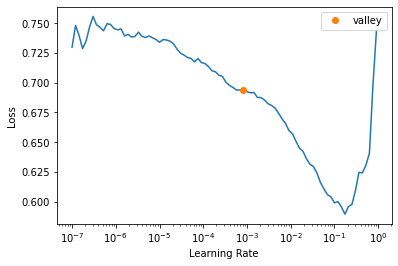

In [ ]:
# 7.1 select the appropriate learning rate
#       we typically find the point where the slope is steepest
learn.lr_find()

See [this StackOverflow answer](https://stackoverflow.com/a/62986041) as to why the suggested lr is not 0.1 but 0.002.

SuggestedLRs(valley=0.002511886414140463)

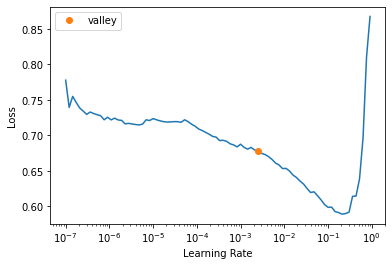

In [ ]:
# 7.2
lr_steepest = learn.lr_find()

lr_steepest

## Our model

### Embedding layers
Embedding layer has one more class than it actually exist in the categorical feature. For explanation, see [here](https://forums.fast.ai/t/embedding-layer-has-one-more-row-than-expected/39240).

In [ ]:
to.xs.head(2)

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
21984,1,16,1,1,5,2,1,0.325431,-1.016444,-0.031179
29754,5,12,1,2,5,5,1,0.032593,-0.160036,-0.424105


In [ ]:
# 8.0 Get no of unique values in each cat feature:
for i in cat_names :
  n = df[i].nunique()
  print(f"No of unique values in {i} are {n}")

No of unique values in workclass are 9
No of unique values in education are 16
No of unique values in marital-status are 7
No of unique values in occupation are 15
No of unique values in relationship are 6
No of unique values in race are 5


In [ ]:
# 8.1 Total size of word-2-vectors: [6+8+5+8+5+4+3] = 39
learn.embeds

ModuleList(
  (0): Embedding(10, 6)
  (1): Embedding(17, 8)
  (2): Embedding(8, 5)
  (3): Embedding(16, 8)
  (4): Embedding(7, 5)
  (5): Embedding(6, 4)
  (6): Embedding(3, 3)
)

### Complete model

In [ ]:
# 8.2 Complete model
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=42, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=2, bias=True)
    )
  )
)

### Other extras!

In [ ]:
# 8.3 Drop outs in embedding layers
learn.emb_drop

Dropout(p=0.0, inplace=False)

In [ ]:
# 8.4 Batch Normalization layer
learn.bn_cont

BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
# 8.5 Model layers:
learn.layers

Sequential(
  (0): LinBnDrop(
    (0): Linear(in_features=42, out_features=200, bias=False)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): LinBnDrop(
    (0): Linear(in_features=200, out_features=100, bias=False)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): LinBnDrop(
    (0): Linear(in_features=100, out_features=2, bias=True)
  )
)

And we can train that model with the `fit_one_cycle` method (the `fine_tune` method won’t be useful here since we don’t have a pretrained model).

## Train the model

In [ ]:
# 9.0 Less the batch_size (bs), more the time:
#     On slice(), see this discussion:
#      https://forums.fast.ai/t/what-does-the-slice-lr-mean-in-fit-one-cycle/60896/6

learn.fit_one_cycle(10, slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.378371,0.372592,0.830006,00:03
1,0.358295,0.367816,0.833692,00:03
2,0.360978,0.367040,0.832156,00:03
3,0.353231,0.361850,0.831388,00:03
4,0.356367,0.354619,0.837531,00:03
5,0.364439,0.355376,0.837991,00:03
6,0.350311,0.349752,0.840909,00:03
7,0.349428,0.349444,0.840602,00:03
8,0.339925,0.348624,0.842598,00:03
9,0.369929,0.349791,0.842291,00:03


## Make predictions

### Directly from a DataFrame

In [ ]:
# 10.0 We can then have a look at some predictions:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,6.0,16.0,1.0,4.0,2.0,5.0,1.0,0.764689,0.107938,-0.031179,0.0,0.0
1,5.0,12.0,3.0,5.0,1.0,5.0,1.0,1.277156,-0.093303,-0.424105,1.0,1.0
2,5.0,9.0,5.0,15.0,4.0,2.0,1.0,-1.138761,-0.478502,0.361747,0.0,0.0
3,5.0,12.0,1.0,9.0,5.0,5.0,1.0,0.764689,0.367795,-0.424105,0.0,0.0
4,5.0,2.0,5.0,0.0,4.0,5.0,1.0,-1.138761,1.448337,-1.209957,0.0,0.0
5,5.0,16.0,3.0,5.0,1.0,5.0,1.0,-0.260246,2.095067,-0.031179,0.0,1.0
6,5.0,16.0,5.0,9.0,2.0,5.0,1.0,0.471850,-0.491806,-0.031179,0.0,0.0
7,5.0,16.0,3.0,13.0,1.0,5.0,1.0,0.398641,-1.142381,-0.031179,0.0,1.0
8,5.0,16.0,5.0,2.0,2.0,5.0,1.0,-1.285180,0.339054,-0.031179,0.0,0.0


In [ ]:
# 10.1 Make prediction for one row:
row, clas, probs = learn.predict(df.iloc[0])

In [ ]:
# 10.2 Show result of one row
row.show()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Assoc-acdm,Married-civ-spouse,#na#,Wife,White,False,49.0,101320.001336,12.0,>=50k


In [ ]:
# 10.3 Other information
clas, probs

(tensor(1), tensor([0.4348, 0.5652]))

### From Data Loader object

To get prediction on a new dataframe, you can use the test_dl method of the DataLoaders. That dataframe does not need to have the dependent variable in its column. About `test_dl` object , see [here](https://muellerzr.github.io/fastblog/2020/08/10/testdl.html)

In [ ]:
# 11.0
test_df = df.copy()
test_df.drop(['salary'], axis=1, inplace=True)

In [ ]:
# 11.1 Transform test_df exactly in the manner
#      train was done using test_dl
dl = learn.dls.test_dl(test_df)

In [ ]:
# 11.2 Get predictions now:

learn.get_preds(dl=dl)

(tensor([[0.4348, 0.5652],
         [0.3864, 0.6136],
         [0.9833, 0.0167],
         ...,
         [0.5419, 0.4581],
         [0.7030, 0.2970],
         [0.7066, 0.2934]]), None)

### Get prediction from any arbitrary data

In [ ]:
# 12.0
test_data = {
    'age': [49], 
    'workclass': ['Private'], 
    'fnlwgt': [101320],
    'education': ['Assoc-acdm'], 
    'education-num': [12.0],
    'marital-status': ['Married-civ-spouse'], 
    'occupation': [''],
    'relationship': ['Wife'],
    'race': ['White'],
}

# 12.1
input = pd.DataFrame(test_data)

In [ ]:
# 12.2
tdl = learn.dls.test_dl(input)

In [ ]:
# 12.3
learn.get_preds(dl=tdl)

(tensor([[0.7731, 0.2269]]), None)

## USing fastai pre-processing with sklearn and other libraries

As mentioned earlier, `TabularPandas` is a powerful and easy preprocessing tool for tabular data. Integration with libraries such as `Random Forests` and `XGBoost` requires only one extra step, that the .dataloaders call did for us. Let’s look at our `to` object again. Its values are stored in a DataFrame like object, where we can extract the `cats`, `conts`, `xs` and `ys` if we want to:

In [ ]:
# 13.0
to.xs[:3]

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
21984,1,16,1,1,5,2,1,0.325431,-1.016444,-0.031179
29754,5,12,1,2,5,5,1,0.032593,-0.160036,-0.424105
27445,5,12,5,2,4,5,1,-0.626293,-0.206598,-0.424105


Now that everything is encoded, you can then send this off to `XGBoost` or `Random Forests` by extracting the train and validation sets and their values:

In [ ]:
# 13.1 Get split and pre-processed data:

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [ ]:
# 13.2
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(26049, 10)

(6512, 10)

(26049,)

(6512,)

In [ ]:
###########################